<a href="https://colab.research.google.com/github/ShwetaBaranwal/HandsonML/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Defining mse for error analysis

In [3]:
def mean_squared_error(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [51]:
mean_squared_error(np.array([2,3,4]), np.array([4,5,3]))

3.0

computing theta using formula

In [139]:
X = np.c_[2*np.random.rand(1000,1), 5*np.random.rand(1000,1)]
y = 4.2 + np.dot(X, [2.4,3.7])
(y.shape, X.shape)

((1000,), (1000, 2))

In [140]:
m, n = X.shape
print (m,n)
X_b = np.c_[np.ones((m,1)), X] # for bias term
X_b.shape

1000 2


(1000, 3)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.4, random_state=40)

In [142]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 3), (400, 3), (600,), (400,))

In [143]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [144]:
theta_best

array([4.2, 2.4, 3.7])

In [145]:
theta_best.shape

(3,)

In [146]:
y_pred = np.dot(X_test, theta_best)
mean_squared_error(y_test, y_pred)

6.06219884139717e-29

computing theta using gradient descend

In [147]:
lr = 0.1
# theta_gd = np.random.rand(3,)
theta_gd = np.array([2,1,2])
error = []

for i in range(200):
  grad = (2/m)*X_train.T.dot(X_train.dot(theta_gd) - y_train)
  theta_gd = theta_gd - lr*grad
  y_pred = np.dot(X_test, theta_gd)
  error.append(mean_squared_error(y_test, y_pred))


In [149]:
grad.shape

(3,)

In [148]:
theta_gd

array([4.14458967, 2.42957992, 3.70753815])

In [83]:
y_pred = np.dot(X_test, theta_gd)
mean_squared_error(y_test, y_pred)

0.001431891357741451

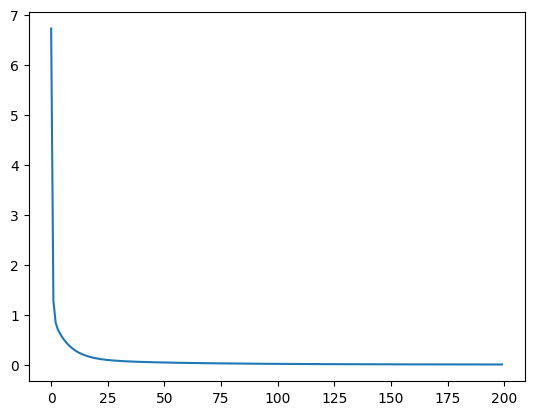

In [84]:
plt.plot(error)

writing class for linear reg

In [164]:
class LinearRegression:
  def __init__(self, lr=0.01, n_iter=1000):
    self.lr = lr
    self.n_iter = n_iter
    self.intercept_ = None
    self.coef_ = None

  def fit(self, X, y):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X] #to include bias term
    theta_gd = np.random.rand(n+1, 1)
    for i in range(self.n_iter):
      grad = (2/m) * X_b.T.dot(X_b.dot(theta_gd) - y) # batch gradient
      theta_gd = theta_gd - self.lr * grad
    self.intercept_ = theta_gd[0]
    self.coef_ = theta_gd[1:]

    return self.intercept_ , self.coef_

  def predict(self, X):
    y_pred = np.dot(X, self.coef_) + self.intercept_
    return y_pred


In [159]:
X = np.random.rand(1000,2)
y = (2 + np.dot(X, [4,3])).reshape(1000,1) #to avoid error, reshape to (m,1) than (m,)
X.shape, y.shape

((1000, 2), (1000, 1))

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

In [161]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 2), (400, 2), (600, 1), (400, 1))

In [166]:
linear_reg = LinearRegression(0.1, 200)
linear_reg.fit(X_train, y_train)

(array([2.14705176]),
 array([[3.83900513],
        [2.89044569]]))

In [167]:
y_train_pred = linear_reg.predict(X_train)
y_pred = linear_reg.predict(X_test)

In [168]:
mean_squared_error(y_train_pred, y_train), mean_squared_error(y_pred, y_test)

(0.003549516522610855, 0.003470463718176153)

using formula method

In [173]:
# adding column in X for bias coef
X_train_ = np.c_[np.ones((len(X_train),1)), X_train]
X_test_ = np.c_[np.ones((len(X_test),1)), X_test]
theta_best = np.linalg.inv(X_train_.T.dot(X_train_)).dot(X_train_.T).dot(y_train)
theta_best

array([[2.],
       [4.],
       [3.]])

In [174]:
mean_squared_error(np.dot(X_train_, theta_best), y_train), mean_squared_error(np.dot(X_test_, theta_best), y_test)

(4.34432274346088e-30, 4.4186071453691926e-30)